In [102]:
from datetime import datetime
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from eigsep_corr import io
%matplotlib inline

In [103]:
DATA_DIR = "/home/christian/Documents/research/eigsep/data-analysis/data/night1"
# subset of files with us definitely gone
files = np.array(sorted(glob(os.path.join(DATA_DIR, "2023101[4-5]*")), key=os.path.getctime)[265:-45])

In [104]:
def fname2ts(f):
    t = f[-len("20231014_202203.eig"):-4]
    y = t[:4]
    mo = t[4:6]
    d = t[6:8]
    h = t[9:11]
    mi = t[11:13]
    s = t[13:15]
    dt = datetime.fromisoformat(f"{y}-{mo}-{d} {h}:{mi}:{s}")
    return dt.timestamp()

ftime = np.empty(len(files))
for i, f in enumerate(files):
    ftime[i] = fname2ts(f)
ix = np.argsort(ftime)[200:]
ftime = ftime[ix]
files = files[ix]

In [109]:
h = io.read_file(files[0])[0]
N_ACC = len(h["acc_cnt"])
ACC_BINS = h["acc_bins"]
NCHAN = h["nchan"]

acc_cnt = []
times = []
sync_time = []
t0s = []
for f in files:
    hdr = io.read_header(f)
    acc_cnt.append(hdr['acc_cnt'])
    times.append(hdr['times'])
    sync_time.append(hdr["sync_time"])
    t0s.append(hdr["times"][0])
acc_cnt = np.concatenate(acc_cnt)
times = np.concatenate(times)
t0s = np.array(t0s)
assert np.allclose(sync_time, sync_time[0])

print(np.allclose(np.diff(acc_cnt), 1))

True


In [110]:
print((times[0] - ftime[0]) / 3600)

-4.178792725139194


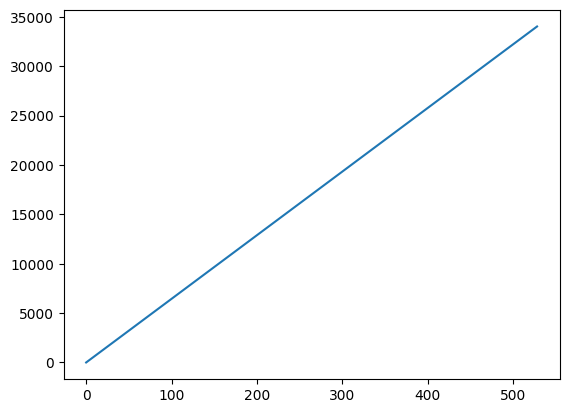

In [111]:
plt.figure()
plt.plot(ftime-ftime[0])
plt.show()

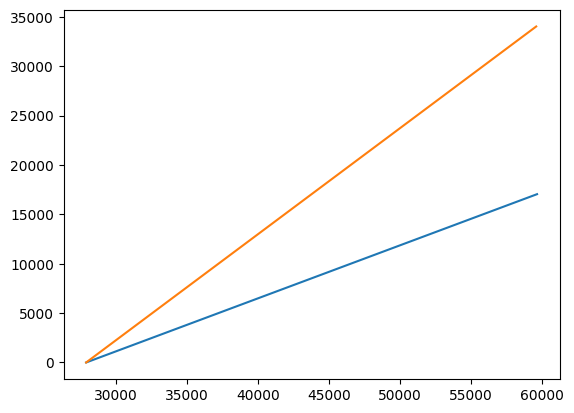

In [108]:
plt.figure()
plt.plot(acc_cnt, times-times[0])
plt.plot(acc_cnt[::60], ftime-ftime[0])
plt.show()

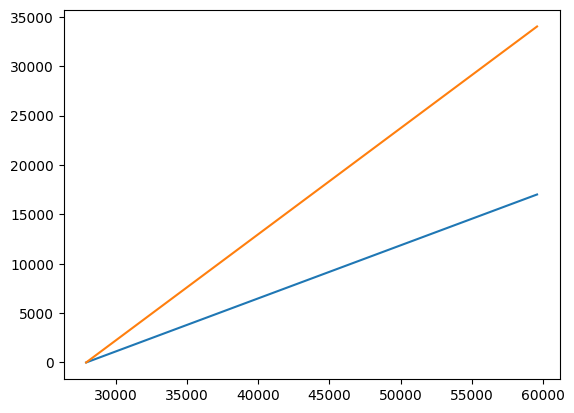

In [112]:
plt.figure()
plt.plot(acc_cnt[::60], t0s-t0s[0])
plt.plot(acc_cnt[::60], ftime-ftime[0])
plt.show()

In [113]:
t0s = t0s - t0s[0]
ftime = ftime - ftime[0]
t0s = t0s[1:]
ftime = ftime[1:]

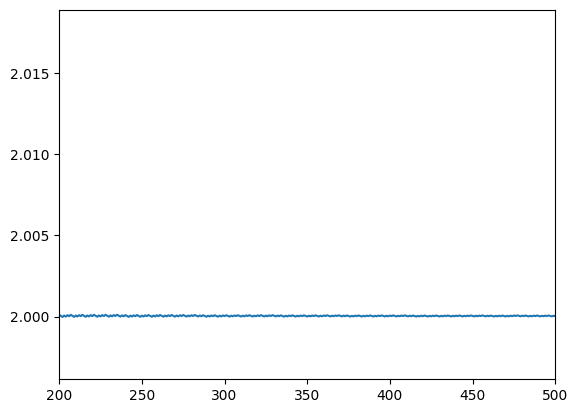

In [116]:
plt.figure()
plt.plot(ftime/t0s)
plt.xlim(200, 500)
plt.show()

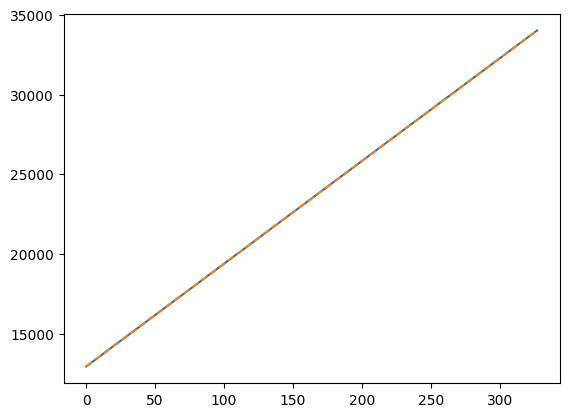

In [117]:
t0s = t0s[200:]
ftime = ftime[200:]
plt.figure()
plt.plot(t0s*2)
plt.plot(ftime, ls="--")
plt.show()

In [18]:
hdr

{'dtype': ['int32', '>'],
 'infochan': 2,
 'nchan': 1024,
 'acc_bins': 2,
 'fpg_file': 'eigsep_corr/data/eigsep_fengine_1g_v2_2_2023-10-06_1806.fpg',
 'fpg_version': [2, 2],
 'sample_rate': 500000000,
 'gain': 4,
 'corr_acc_len': 268435456,
 'corr_scalar': 512,
 'pol01_delay': 623,
 'pam_atten': {0: [8, 8], 1: [8, 8], 2: [8, 8]},
 'fft_shift': 255,
 'pairs': ['0', '1', '2', '3', '4', '5', '02', '04', '24', '13', '15', '35'],
 'acc_cnt': array([58987, 58988, 58989, 58990, 58991, 58992, 58993, 58994, 58995,
        58996, 58997, 58998, 58999, 59000, 59001, 59002, 59003, 59004,
        59005, 59006, 59007, 59008, 59009, 59010, 59011, 59012, 59013,
        59014, 59015, 59016, 59017, 59018, 59019, 59020, 59021, 59022,
        59023, 59024, 59025, 59026, 59027, 59028, 59029, 59030, 59031,
        59032, 59033, 59034, 59035, 59036, 59037, 59038, 59039, 59040,
        59041, 59042, 59043, 59044, 59045, 59046], dtype='>i4'),
 'sync_time': 1697326395.8896482,
 'header_size': 887,
 'data_start':